In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Graph

In [2]:
# w.get_zillow_data()

In [5]:
df = w.get_zillow_data(cached=True)

In [6]:
df.columns

Index(['parcelid', 'id', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [4]:
# there are a lot of nulls in this dataset, 
# df.shape[0] - (df.shape[0] * .15)

In [16]:
# df.isnull().sum().sort_values(ascending=False) 

df.groupby('propertylandusetypeid').count()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
propertylandusetypeid,,,,,,,,,,,,,,,,,,,,,
31.0,4,4,0,0,0,4,4,4,4,0,...,4,4,4,4,0,0,4,4,4,4
246.0,513,513,39,0,0,513,513,0,450,474,...,513,513,513,513,39,39,513,513,513,513
247.0,149,149,7,0,0,149,149,0,116,137,...,149,149,149,149,10,10,149,149,149,149
248.0,221,221,17,0,0,221,221,0,170,184,...,221,221,221,221,12,12,220,221,221,221
260.0,12,12,0,0,0,12,12,0,4,4,...,12,12,12,12,0,0,11,12,12,12
261.0,15037,15037,3982,15,11,15037,15037,0,9573,14991,...,15037,15037,15037,15036,527,527,14991,15037,15037,15037
263.0,18,18,0,0,0,18,18,0,13,15,...,18,18,18,18,0,0,18,18,18,18
264.0,2,2,2,0,0,2,2,0,2,2,...,2,2,2,2,1,1,2,2,2,2
265.0,93,93,0,0,1,93,93,0,0,93,...,93,93,93,93,0,0,93,93,93,93


In [6]:
# df = df.dropna(axis=1,thresh=18653)

In [7]:
# features = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'lotsizesquarefeet','latitude', 'longitude', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'transactiondate']

In [8]:
# df = df[features]

In [9]:
# df.set_index('parcelid', inplace=True)

In [10]:
# df.columns

In [13]:
# df.columns = ['bathrooms',
#              'bedrooms',
#              'square_feet',
#              'fips',
#              'lot_size_sqft',
#              'latitude',
#              'longitude',
#              'zip_code',
#              'year_built',
#              'tax_value',
#              'transaction_date']

In [14]:
# df = df.dropna()

In [15]:
# df.info()

In [16]:
# df.fips = df.fips.astype(int)

In [17]:
# df.zip_code = df.zip_code.astype(int)

In [18]:
# df.year_built = df.year_built.astype(int)

In [19]:
# df['age_of_home'] = (2021 - df.year_built)

In [20]:
# df.info()

In [21]:
# df = ex.remove_outliers(df, 'square_feet', multiplier=1.5)

In [22]:
# df = ex.remove_outliers(df, 'tax_value', multiplier=1.5)

In [23]:
# df.info()

In [17]:
df = w.wrangle_zillow()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17765 entries, 11393337 to 13083743
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bathrooms         17765 non-null  float64
 1   bedrooms          17765 non-null  float64
 2   square_feet       17765 non-null  float64
 3   fips              17765 non-null  int64  
 4   lot_size_sqft     17765 non-null  float64
 5   latitude          17765 non-null  float64
 6   longitude         17765 non-null  float64
 7   zip_code          17765 non-null  int64  
 8   year_built        17765 non-null  int64  
 9   tax_value         17765 non-null  float64
 10  transaction_date  17765 non-null  object 
 11  age_of_home       17765 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 1.8+ MB


# Wrangle above,
# Exploration Below

In [23]:
train, validate, test = w.train_validate_test_split(df)

In [24]:
train.shape, validate.shape, test.shape

((9899, 12), (4243, 12), (3536, 12))

In [25]:
list(train.columns)

['bathrooms',
 'bedrooms',
 'square_feet',
 'fips',
 'lot_size_sqft',
 'latitude',
 'longitude',
 'zip_code',
 'year_built',
 'tax_value',
 'transaction_date',
 'age_of_home']

In [49]:
target = 'tax_value'

In [ ]:
sns.pairplot(data = train)

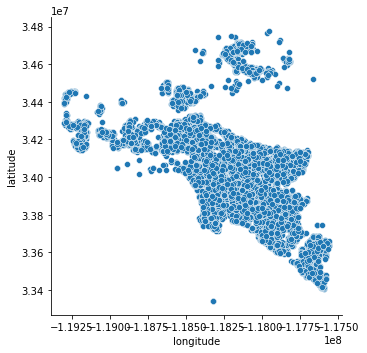

In [55]:
sns.relplot(data=train, y='latitude', x='longitude',)

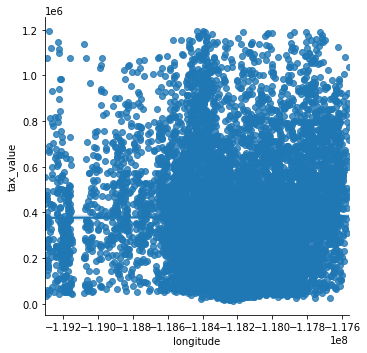

In [33]:
sns.